<div style="width: 90%; text-align: center; margin: auto; padding: 20px; background-color: #ecf0f1; border-radius: 0 12px 12px 12px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.3);" markdown="1">
    <span style="font-size: 35px; font-weight: bold;">SPAM OR HAM</span>
</div>

<div style="width: 90%; margin: auto; text-align: center; background-color: #1a1a1a; padding: 20px; border-radius: 25px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
    <span style="color: #3498db; font-size: 35px; font-weight: bold;">IMPORTING LIBRARY</span>
</div>

In [1]:
#Importing all the libraries to be used
import warnings
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np 
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline    
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
#from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics

<div style="width: 90%; margin: auto; text-align: center; background-color: #1a1a1a; padding: 20px; border-radius: 25px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
    <span style="color: #3498db; font-size: 35px; font-weight: bold;">LOADING DATASET</span>
</div>

In [2]:
# Reading DataSet
spam = pd.read_csv("../input/sms-spam-collection-dataset/spam.csv",encoding='latin1')
spam.shape

(5572, 5)

<Axes: >

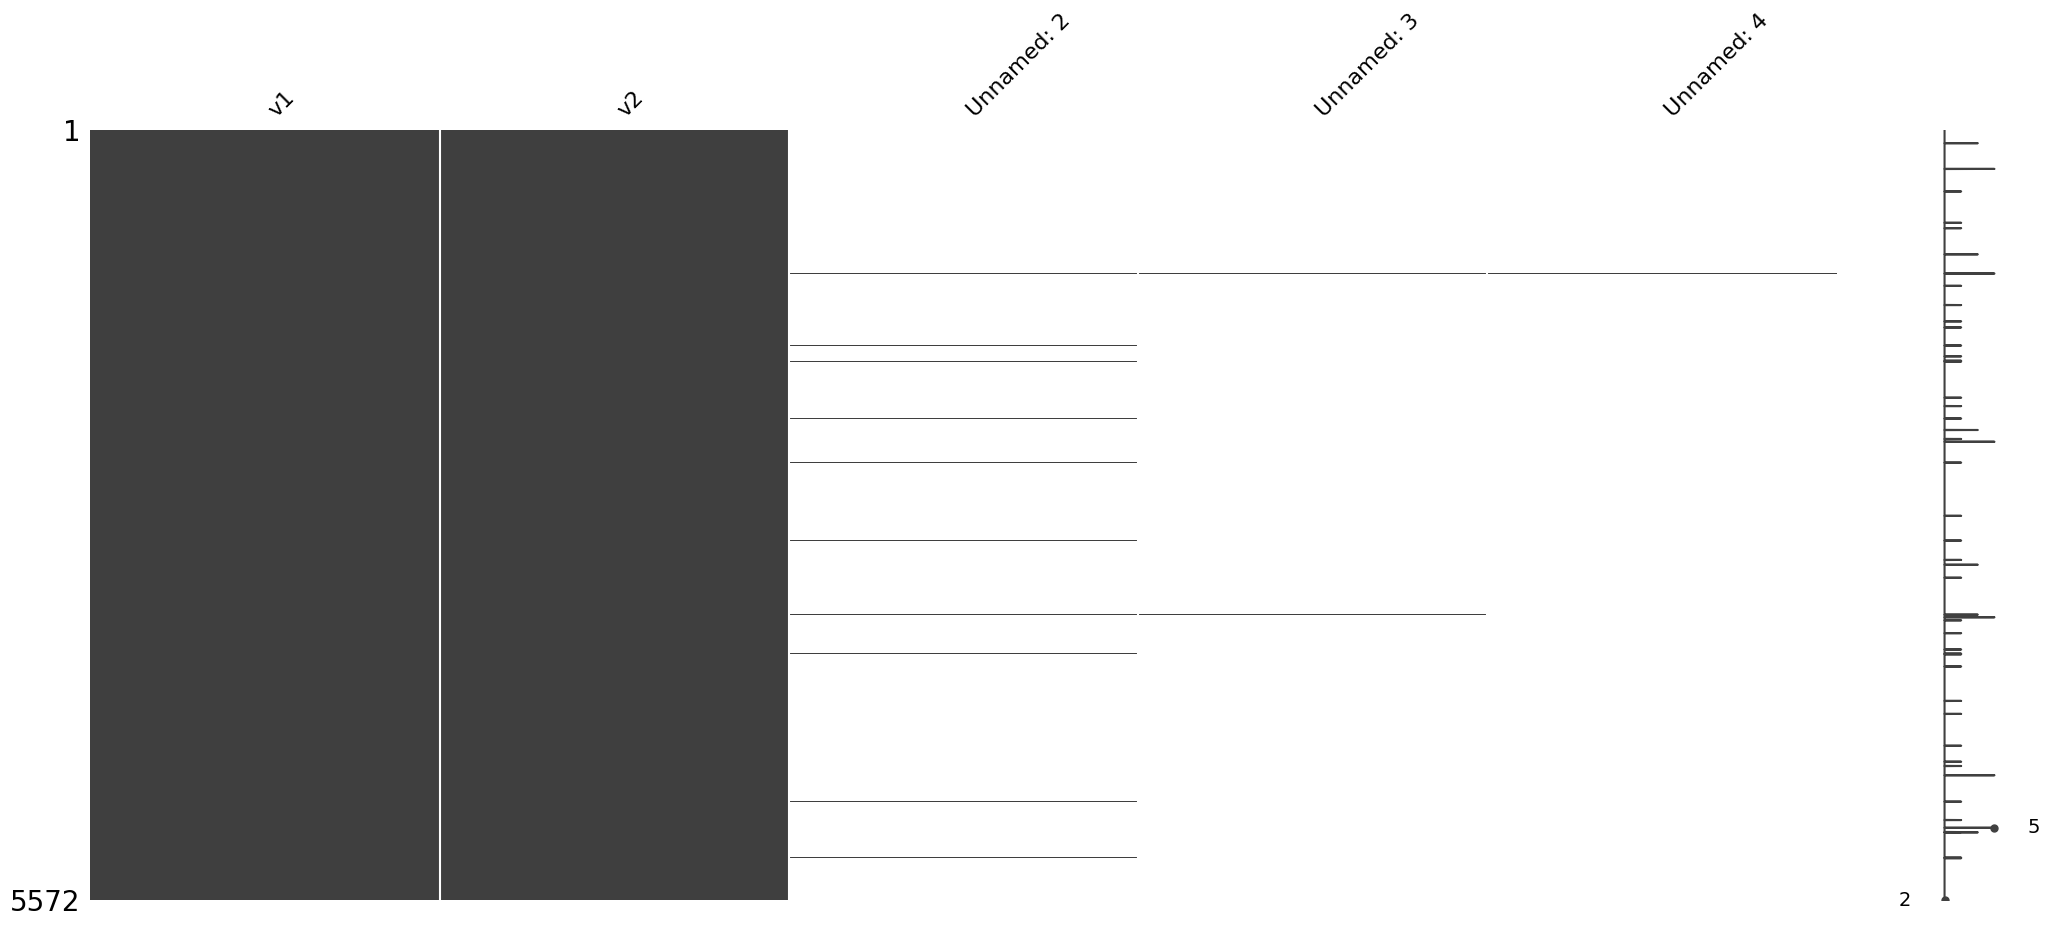

In [3]:
# Visualizing missing value
msno.matrix(spam)

In [4]:
# Shadow of dataSet
df = spam.copy()
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1315,ham,"Whenevr ur sad, Whenevr ur gray, Remembr im he...",NaN,NaN,NaN
1062,ham,Ok. Not sure what time tho as not sure if can ...,NaN,NaN,NaN
1978,ham,No I'm in the same boat. Still here at my moms...,NaN,NaN,NaN
2619,spam,<Forwarded from 21870000>Hi - this is your Mai...,NaN,NaN,NaN
4489,ham,My computer just fried the only essential part...,NaN,NaN,NaN



<div style="width: 90%; margin: auto; text-align: center; background-color: #1a1a1a; padding: 20px; border-radius: 25px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
    <span style="color: #3498db; font-size: 35px; font-weight: bold;">LITTLE BIT DATA CLEANING</span>
</div>

In [5]:
# Droping Redundent column
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
# Renaming The Version columns
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)
df

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...



<div style="width: 90%; margin: auto; text-align: center; background-color: #1a1a1a; padding: 20px; border-radius: 25px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
    <span style="color: #3498db; font-size: 35px; font-weight: bold;">DATA VISUALIZATION</span>
</div>

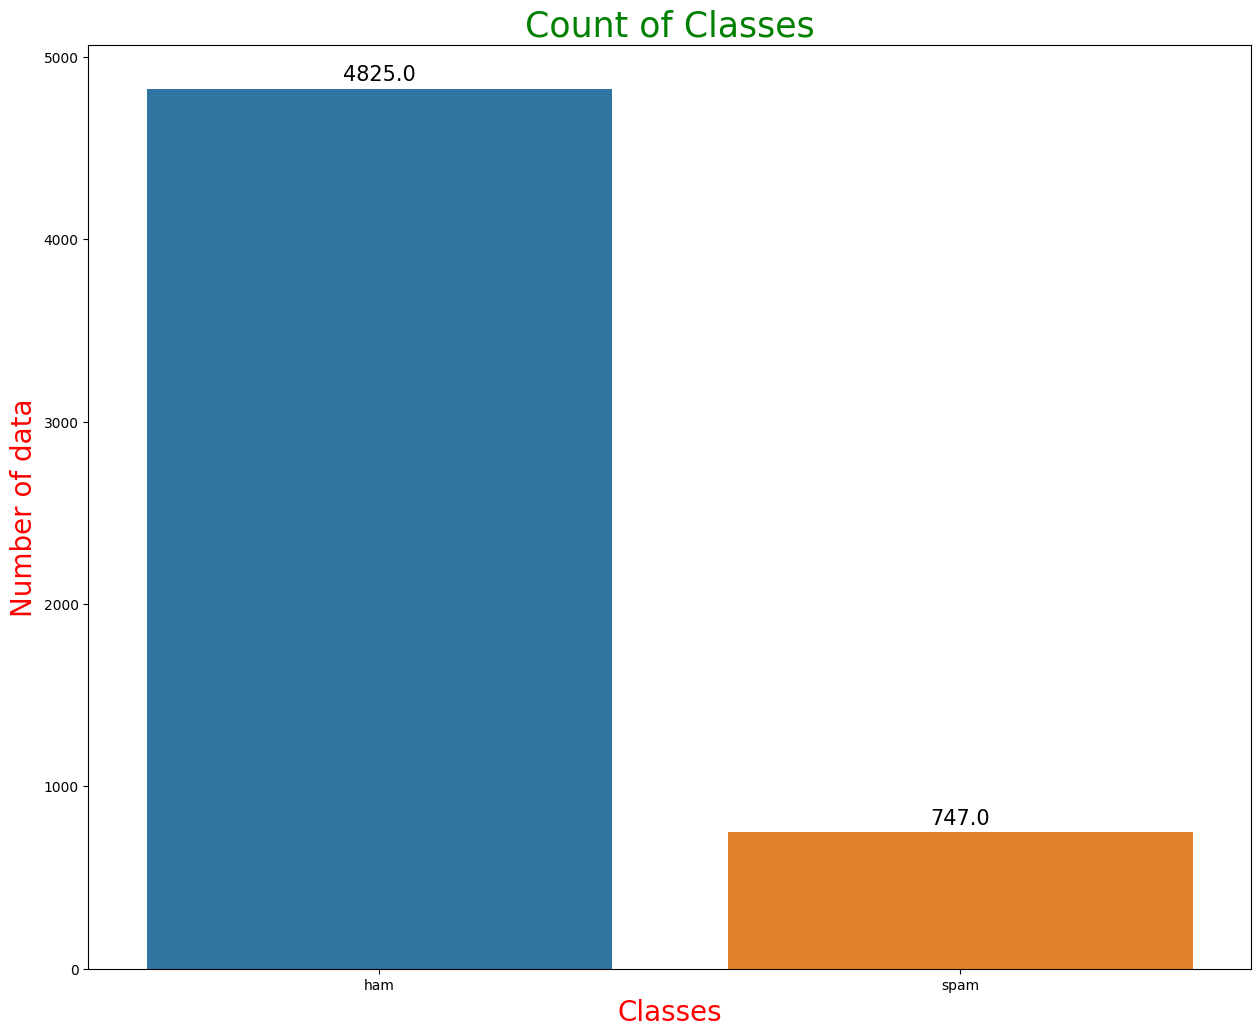

In [6]:
# Checking target column for further analysis
plt.figure(figsize=(15, 12))
fig = sns.countplot(x=df['Target'])
fig.set_title('Count of Classes', fontsize=25, color='green')
fig.set_xlabel('Classes', fontsize=20, color='red')
fig.set_ylabel('Number of data', fontsize=20, color='red')

# Adding annotations
for p in fig.patches:
    fig.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=15, color='black', xytext=(0, 10),
                 textcoords='offset points')

plt.show()


<div style="width: 90%; margin: auto; text-align: center; background-color: #1a1a1a; padding: 20px; border-radius: 25px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
    <span style="color: #3498db; font-size: 35px; font-weight: bold;">FEATURE ENGINEERING</span>
</div>

In [7]:
# creating a new column count of characters
df['No_of_Character'] = df['Text'].apply(len)
df['No_of_Words'] = df.apply(lambda row: nltk.word_tokenize(row['Text']),axis=1).apply(len)
df['No_of_Sentences'] = df.apply(lambda row: nltk.sent_tokenize(row['Text']),axis=1).apply(len)
# Examing description of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
No_of_Character,5572.0,80.118808,59.690841,2.0,36.0,61.0,121.0,910.0
No_of_Words,5572.0,18.501256,13.637056,1.0,9.0,15.0,27.0,219.0
No_of_Sentences,5572.0,1.991565,1.501427,1.0,1.0,1.5,2.0,38.0


<Figure size 1500x1200 with 0 Axes>

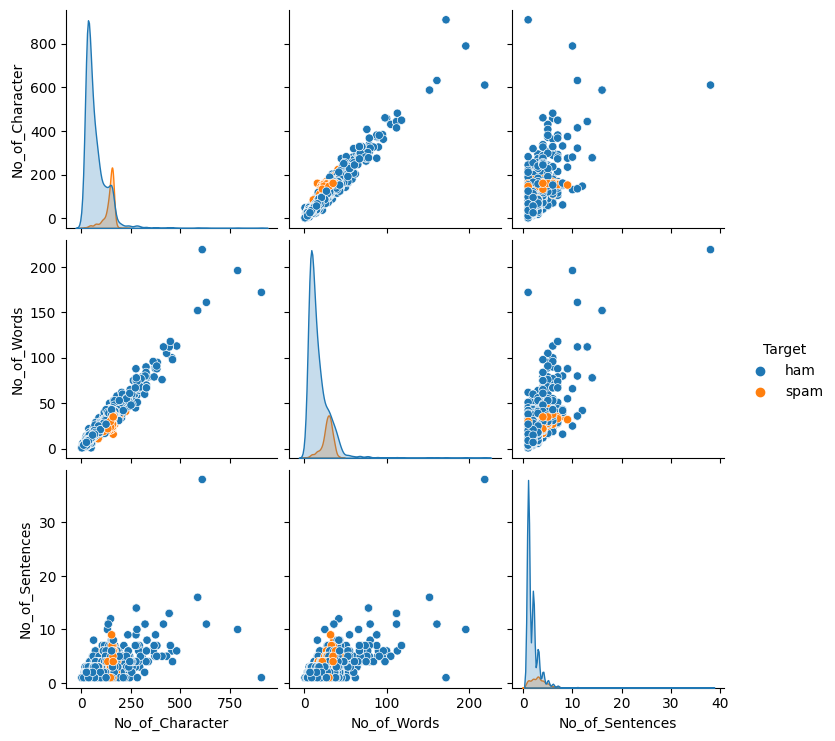

In [8]:
plt.figure(figsize=(15,12))
sns.pairplot(data=df,hue='Target')
plt.show()


<div style="width: 90%; margin: auto; text-align: center; background-color: #1a1a1a; padding: 20px; border-radius: 25px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
    <span style="color: #3498db; font-size: 35px; font-weight: bold;">OUTLIER DETECTION</span>
</div>

In [9]:
# Droping the Outlier
df = df[(df['No_of_Character']<350)]
df.shape

(5548, 5)

<Figure size 1500x1200 with 0 Axes>

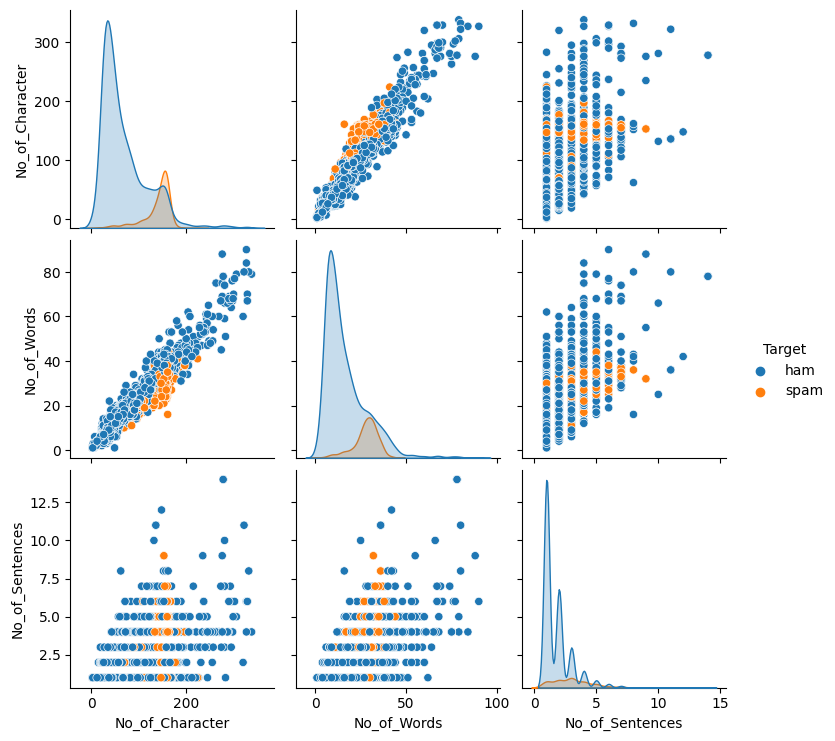

In [10]:
# After examing
plt.figure(figsize=(15,12))
sns.pairplot(data=df, hue='Target')
plt.show()


<div style="width: 90%; margin: auto; text-align: center; background-color: #1a1a1a; padding: 20px; border-radius: 25px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
    <span style="color: #3498db; font-size: 35px; font-weight: bold;">DATA PREPREPROCESSING</span>
</div>

In [11]:
# let me check the sample text before cleaning 
print("\033[1m\u001b[45;1m The First 5 Texts:\033[0m",*df["Text"][:5], sep = "\n")

 The First 5 Texts:
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
U dun say so early hor... U c already then say...
Nah I don't think he goes to usf, he lives around here though


In [12]:
# Creating a function to clean up the text
def clean(Text):
    sms = re.sub('[^a-zA-Z]',' ',Text) # Replacing all non-alphabetic
# Chracter with a space
    sms = sms.lower()
    sms = sms.split()
    sms = ' '.join(sms)
    return sms
df.loc[:,'Clean_text'] = df['Text'].apply(clean)
# Checking after cleaning
print("\033[1m\u001b[45;1m The First 5 After Cleaning Texts:\033[0m",*df["Clean_text"][:5], sep = "\n")

 The First 5 After Cleaning Texts:
go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
ok lar joking wif u oni
free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry question std txt rate t c s apply over s
u dun say so early hor u c already then say
nah i don t think he goes to usf he lives around here though


/tmp/ipykernel_47/3812940305.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'Clean_text'] = df['Text'].apply(clean)



<div style="width: 90%; margin: auto; text-align: center; background-color: #1a1a1a; padding: 20px; border-radius: 25px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
    <span style="color: #3498db; font-size: 35px; font-weight: bold;">TOKENIZATION</span>
</div>

In [13]:
df.loc[:,'Tokenize_text'] = df.apply(lambda row: nltk.word_tokenize(row['Clean_text']),axis=1)
# checking after tikenize the text
print("\033[1m\u001b[45;1m The First 5 After Tokenize Texts:\033[0m",*df["Tokenize_text"].loc[:5], sep = "\n")

 The First 5 After Tokenize Texts:
['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'in', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'to', 'to', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 't', 'c', 's', 'apply', 'over', 's']
['u', 'dun', 'say', 'so', 'early', 'hor', 'u', 'c', 'already', 'then', 'say']
['nah', 'i', 'don', 't', 'think', 'he', 'goes', 'to', 'usf', 'he', 'lives', 'around', 'here', 'though']
['freemsg', 'hey', 'there', 'darling', 'it', 's', 'been', 'week', 's', 'now', 'and', 'no', 'word', 'back', 'i', 'd', 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'to', 'send', 'to', 'rcv']


/tmp/ipykernel_47/4069421256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'Tokenize_text'] = df.apply(lambda row: nltk.word_tokenize(row['Clean_text']),axis=1)



<div style="width: 90%; margin: auto; text-align: center; background-color: #1a1a1a; padding: 20px; border-radius: 25px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
    <span style="color: #3498db; font-size: 35px; font-weight: bold;">REMOVING STOPWORDS</span>
</div>

In [14]:
# creating the stopwords function
def remove_stopwords(text):
    stop_word = set(stopwords.words('english'))
    filtered_text = [word for word in text if word not in stop_word]
    return filtered_text
df.loc[:,'Nostopword_text'] = df['Tokenize_text'].apply(remove_stopwords)
# checking after Nostopwords text
print("\033[1m\u001b[45;1m The First 5 After Nostopword Texts:\033[0m",*df["Nostopword_text"].loc[:5], sep = "\n")

 The First 5 After Nostopword Texts:
['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply']
['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']
['nah', 'think', 'goes', 'usf', 'lives', 'around', 'though']
['freemsg', 'hey', 'darling', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'send', 'rcv']


/tmp/ipykernel_47/3467140968.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'Nostopword_text'] = df['Tokenize_text'].apply(remove_stopwords)



<div style="width: 90%; margin: auto; text-align: center; background-color: #1a1a1a; padding: 20px; border-radius: 25px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
    <span style="color: #3498db; font-size: 35px; font-weight: bold;">LEMMATIZATION</span>
</div>

In [ ]:
import spacy

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Lemmatize the list of words
def lemmatize_words(words):
    doc = nlp(" ".join(words))
    lemmas = [token.lemma_ for token in doc]
    return lemmas

# Apply lemmatization to the "Nostopword_text" column
df.loc[:, "Lemmatized_Text"] = df["Nostopword_text"].apply(lemmatize_words)

# Print the lemmatized text
print("\033[1m\u001b[45;1m The First 5 Texts after lemmatization:\033[0m", *df["Lemmatized_Text"][:5], sep="\n")


<div style="width: 90%; margin: auto; text-align: center; background-color: #1a1a1a; padding: 20px; border-radius: 25px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
    <span style="color: #3498db; font-size: 35px; font-weight: bold;">VECTORIZE</span>
</div>

In [ ]:
# Building a Corpus for Text Feature to Encode into Vectorized Form
corpus = []
for i in df['Lemmatized_Text']:
    msg = ' '.join([row for row in i])
    corpus.append(msg)
    
corpus[:5]
print("\033[1m\u001b[45;1m The First 5 lines in corpus :\033[0m",*corpus[:5], sep = "\n")

In [ ]:
# Changing text data into a numbers
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()
#Let's have a look at our feature 
X.dtype

In [ ]:
#Label encode the Target and use it as y
label_encoder = LabelEncoder()
df.loc[:,"Target"] = label_encoder.fit_transform(df["Target"])


<div style="width: 90%; margin: auto; text-align: center; background-color: #1a1a1a; padding: 20px; border-radius: 25px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
    <span style="color: #3498db; font-size: 35px; font-weight: bold;">MODEL BUILDING</span>
</div>

In [ ]:
#Setting values for labels and feature as y and X(we already did X in vectorizing...)
y = df['Target']
# spliting the testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=45)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder to convert string labels to numeric values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Testing on the classifiers
classifiers = [MultinomialNB(),
               RandomForestClassifier(),
               KNeighborsClassifier(),
               SVC()]

for idx, cls in enumerate(classifiers):
    cls.fit(X_train, y_train_encoded)

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "NaiveBayes", 1: "RandomForest", 2: "KNeighbours", 3: "SVC"}

In [ ]:
# Cross-validation
for i, model in enumerate(classifiers):
    cv_score = cross_val_score(model, X_train, y_train_encoded, scoring="accuracy", cv=10)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))


<div style="width: 90%; margin: auto; text-align: center; background-color: #1a1a1a; padding: 20px; border-radius: 25px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
    <span style="color: #3498db; font-size: 35px; font-weight: bold;">EVALUATING MODELS</span>
</div>


In [ ]:
# LabelEncoder to convert string labels to numeric values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)  # transform for test labels

# Model Evaluation
# creating lists of various scores
precision = []
recall = []
f1_score = []
trainset_accuracy = []
testset_accuracy = []

for model in classifiers:
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    prec = metrics.precision_score(y_test_encoded, pred_test)
    recal = metrics.recall_score(y_test_encoded, pred_test)
    f1_s = metrics.f1_score(y_test_encoded, pred_test)
    train_accuracy = model.score(X_train, y_train_encoded)
    test_accuracy = model.score(X_test, y_test_encoded)

    # Appending scores
    precision.append(prec)
    recall.append(recal)
    f1_score.append(f1_s)
    trainset_accuracy.append(train_accuracy)
    testset_accuracy.append(test_accuracy)

In [ ]:
# initialise data of lists.
data = {'Precision':precision,
'Recall':recall,
'F1score':f1_score,
'Accuracy on Testset':testset_accuracy,
'Accuracy on Trainset':trainset_accuracy}
# Creates pandas DataFrame.
Results = pd.DataFrame(data, index =["NaiveBayes", "RandomForest", "KNeighbours","SVC"])

In [ ]:
cmap2 = ListedColormap(["#E2CCFF","green"])
Results.style.background_gradient(cmap=cmap2)

In [ ]:
from sklearn.metrics import confusion_matrix

cmap = ListedColormap(["#E1F16B", "green"])

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for cls, ax in zip(classifiers, axes.flatten()):
    y_pred = cls.predict(X_test)

    # Convert y_test and y_pred to arrays and explicitly set data type to int
    y_test_arr = np.array(y_test, dtype=int)
    y_pred_arr = np.array(y_pred, dtype=int)

    cm = confusion_matrix(y_test_arr, y_pred_arr, labels=np.unique(y_test_arr))

    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, ax=ax)
    ax.set_title(type(cls).__name__)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.show()